# Exercice
Now we will be working on earthquakes and using the naturalearth_lowres from geopandas to support our geographic earthquake data (from kaggle).

A GeoDataFrame can be created by modifying a pandas DataFrame. Thus, we will first read the dataset into a pandas DataFrame.

In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

#### Data processing

In [3]:
eq = pd.read_csv("./datasets/earthquakes.csv")
eq.shape

(23412, 21)

The dataset contains over 23412 events most of which are earthquakes. We will filter the DataFrame so that it only contains earthquake data.

In [4]:
eq = eq[eq['Type'] == 'Earthquake']

There are also some redundant columns for our analysis so we will also filter out those columns.

In [5]:
eq = eq[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
eq.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


We have a DataFrame that contains the data, location, depth, and magnitude of over 20 thousand earthquakes. In order to use GeoPandas, we need to convert this pandas DataFrame to a GeoDataFrame.

We will use the GeoDataFrame function as follows:

#### Creating the GeoPandas Dataframe

In [6]:
gdf = geopandas.GeoDataFrame(eq, geometry=geopandas.points_from_xy(eq.Longitude, eq.Latitude))
gdf.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude,geometry
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0,POINT (145.61600 19.24600)
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8,POINT (127.35200 1.86300)
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2,POINT (-173.97200 -20.57900)
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8,POINT (-23.55700 -59.07600)
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8,POINT (126.42700 11.93800)


The difference between the GeoDataFrame and pandas DataFrame is a GeoSeries called “geometry”. When a spatial method is applied on a GeoDataFrame, it will act on the geometry column.

Think of the “geometry” column as a re-formatted version of the latitude and longitude values. As seen in the previous notebooks in the repo.

We now have the earthquake data stored in a GeoDataFrame. The next step is to draw a map of the world which can easily be done using the “world” GeoDataFrame.

In [8]:
world = geopandas\
.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [9]:
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

<AxesSubplot:>

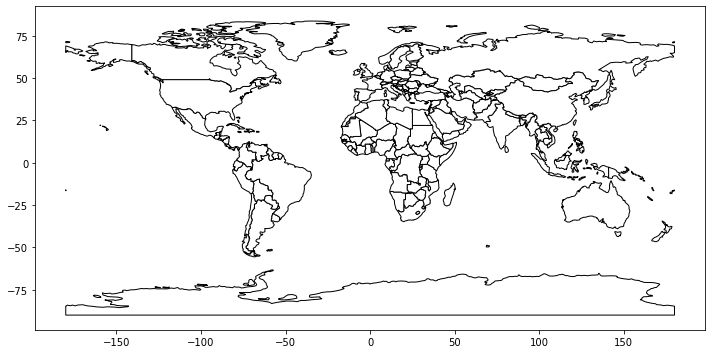

In [10]:
world.plot(color='white', edgecolor='black', figsize=(12,8))

Now we can draw our earthquakes on the map. We need to create an Axes object of the world map and then draw the earthquakes with our "geometry" series.

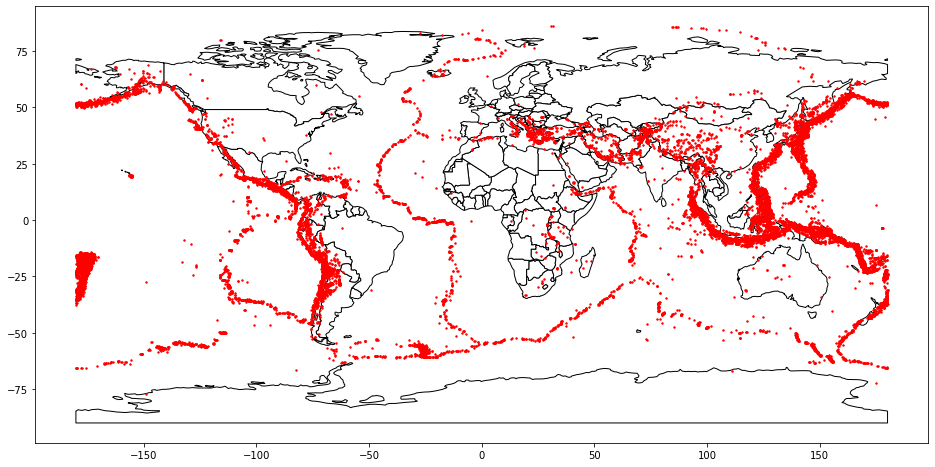

In [11]:
ax = world.plot(color='white', edgecolor='black', figsize=(16, 12))
gdf.plot(ax=ax, color='red', markersize=2)
plt.show()

This map contains all the significant earthquakes that occurred between 1965 and 2016. If you do a quick google search of earthquake fault lines, you will see that they overlap with the map above.

We can clearly see the classic contour of the tectonic plates the main trenches on each side of the pacific plate. With a large number of eartquakes we will need to set a threshold to keep the ones above a certain magnitude to harness their repartition alongside a rift.

### Focusing on one area

One way to focus on a specific country is to filter the earthquakes based on latitude and longitude values. The latitude and longitude values for Japan are given as:
- latitude = 36.204824
- longitude = 138.252924

We can create a range around these values to be used as filtering ranges.

In [12]:
japan_lat = 36.204824
japan_long = 138.252924

japan_eq = eq[(eq.Latitude > 30) & (eq.Latitude < 42) & (eq.Longitude > 130) & (eq.Longitude < 145)]
japan_eq = japan_eq.reset_index(drop=True)

Let’s create a GeoDataFrame that only contains the earthquakes that occurred in or around Japan.

In [13]:
japan_gdf = geopandas.GeoDataFrame(japan_eq, geometry=geopandas.points_from_xy(japan_eq.Longitude, japan_eq.Latitude))

We will plot the map of Japan and mark the earthquakes in japan_gdf. The markersize will be four times proportional to the magnitude of the earthquake on the map.

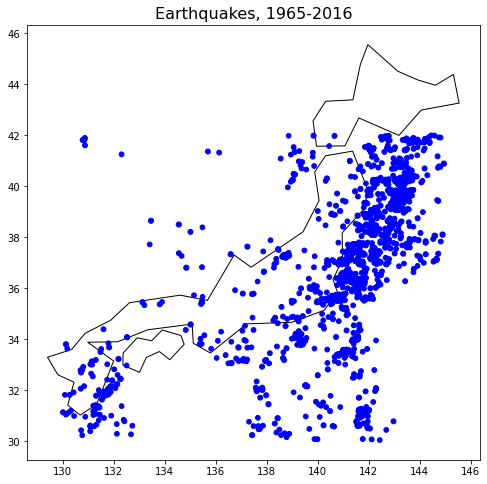

In [14]:
ax = world[world.name == 'Japan'].plot(color='white', edgecolor='black', figsize=(12,8))

japan_gdf.plot(ax=ax, color='blue', markersize=japan_gdf['Magnitude']*4)

plt.title("Earthquakes, 1965-2016", fontsize=16)

plt.show()

### Conclusion

With a set of data containing coordinates, we can easily plot the data on a world map or any map after we transformed the DataFrame into a GeoDataFrame.
There are numerous possibilities with this library in terms of visualization and operations on geographic and geospatial data.